In [47]:
import numpy as np
import sys, os, shutil
import pandas as pd
import collections as cl
import itertools as it
import timeit
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import copy as cp
import scipy as sc

In [213]:
os.chdir("C:/Users/yche465/Desktop/AIM 1/Codes/Synthetic Data")

In [224]:
N=2000
P1=0.42
P2=0.36
P3=1-P1-P2
N1=int(N*P1)
N2=int(N*P2)
N3=N-N1-N2
N_bygroup=[N1,N2,N3]

In [225]:
N_bygroup

[840, 720, 440]

In [232]:
#LO1_Beta=np.array([4.8925, 0.0772, -0.0152, 0.0002]).reshape((4,1))
LO2_Beta=np.array([17.4412,-2.3291,0.08193,-0.00096]).reshape((4,1))
LO3_Beta=np.array([5.5692,0.0684,-0.0055,4.4E-05]).reshape((4,1))
LO4_Beta=np.array([10.4515,-1.3429,0.0475,-0.00049]).reshape((4,1))
L=[LO2_Beta,LO3_Beta,LO4_Beta]                  

if 'X' in locals():
    del X
for i in range(1,53,1):
    x=np.array([1,i,i**2,i**3])
    if i==1:
        X=x
    else:
        X=np.row_stack((X,x))

In [233]:
MU=[]
for i in L:
    lo=np.matmul(X,i).flatten()
    mu=sc.special.expit(lo)
    MU.append(mu)

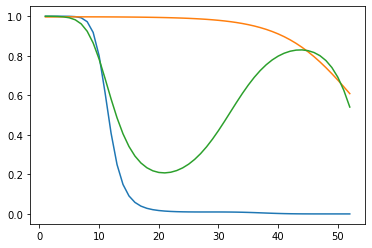

In [234]:
plt.plot(np.linspace(1, 52,52), MU[0])
plt.plot(np.linspace(1, 52,52), MU[1])
plt.plot(np.linspace(1, 52,52), MU[2])

In [235]:
#add truncated noraml noise
from scipy.stats import truncnorm
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

Dat=[0 for k in range(len(N_bygroup))]
for j in range(len(N_bygroup)): 
    for i in range(len(MU[j])): 
        d=get_truncated_normal(MU[j][i],sd=0.05, low=0, upp=1).rvs(N_bygroup[j])
        if i == 0:
            Dat[j]=d
        else:
            Dat[j]=np.column_stack((Dat[j],d))

In [236]:
#Prepare the fake testing dataset
DF=pd.DataFrame(np.concatenate((Dat[0], Dat[1], Dat[2]), axis=0))
DF.columns=["PMC"+str(i+1) for i in range(Dat[0].shape[1])]
DF.insert(0,"ID",np.array(range(1,N+1)),True)
c=[np.repeat(i+1,N_bygroup[i]) for i in range(len(N_bygroup))]
DF["Class"]=list(it.chain(*c))


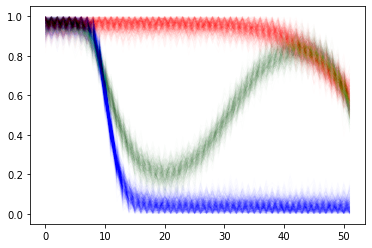

In [255]:
alph=0.007
color=['blue','red','green']
week=np.arange(52)
fig,a= plt.subplots()
for j in range(len(Dat)):
    for i in range(Dat[j].shape[0]):
        a.plot(week,Dat[j][i,:],color[j], linewidth=1, alpha=alph)


In [256]:
DF.to_excel('sample_data.xlsx', sheet_name='sheet1', index=False)